# Unsupervised ML Clustering Lab

# Context

The dataset used has been gathered from several Engineering Colleges. The dataset will be used to create a survey to Rank these colleges. The survey will be an evidence based document which will provide insights to future students.

# Objective

To identify different types of engineering colleges, and group them in clusters based on their ranks and information.  

# Data Description

The data contains a survey of 26 engineering colleges. 
This survey has summarized the data into a rating scale of 1-5 for different factors. 
The rating scale is as follows: 1 - Very low 2 - Low 3 - Medium 4 - High 5 - Very high.

# Features (Columns) of the Dataset

* SR_NO: Serial Number 
* Engg_College: 26 Engineering colleges with A to Z as their names 
* Teaching: The rating for the quality of teaching at each engineering college (1-5)
* Fees: The rating of the fees at each engineering college (1-5) 
* Placements: The rating of the job placement after the student graduates from each engineering college (1-5)
* Internship: The rating of the student Internships at each engineering college (1-5)
* Infrastructure: The rating of the infrastructure of each engineering college (1-5)  

# Importing Libraries

In [1]:
!pip install sklearn --user

In [2]:
!pip install yellowbrick

In [3]:
!pip install StandardScaler

In [4]:
!pip install nb_black

In [5]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

# Loading Dataset

In [6]:
# loading the dataset
data = pd.read_csv("colleges_dataset.csv", index_col=0)

<IPython.core.display.Javascript object>

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

# Basic Data Exploration

In [8]:
df.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
1,A,5,2,5,5,3
2,B,4,2,5,5,3
3,C,4,5,5,4,5
4,D,5,4,5,4,4
5,E,2,5,2,2,5


<IPython.core.display.Javascript object>

In [9]:
df.tail()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
22,V,2,2,1,2,1
23,W,2,5,1,1,1
24,X,1,1,1,2,5
25,Y,1,1,1,1,5
26,Z,3,4,5,2,3


<IPython.core.display.Javascript object>

In [10]:
df.shape

(26, 6)

<IPython.core.display.Javascript object>

Observation: The dataset has 26 rows and 7 columns.

In [11]:
# A DataFrame is a 2-D type of dataset since it contains rows and columns only.
# dimensionality reduction refers to reducing the number of the columns
# dimensionality reduction plays a significant role in data segmentation or clustering.
df.ndim

2

<IPython.core.display.Javascript object>

Observation: The dataset is 2-D.

In [12]:
# viewing a random sample of the dataset
df.sample(n=10, random_state=1)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
19,S,3,5,4,3,3
14,N,3,5,3,3,4
18,R,3,4,4,3,3
4,D,5,4,5,4,4
23,W,2,5,1,1,1
11,K,3,4,3,4,5
20,T,3,5,3,2,3
21,U,2,2,2,2,1
5,E,2,5,2,2,5


<IPython.core.display.Javascript object>

In [13]:
df.isnull().sum()

Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

<IPython.core.display.Javascript object>

Observation: The dataset has no missing values.

In [14]:
# let's check for duplicate observations
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

Observation: The dataset has no duplicate observations.

In [15]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Engg_College    26 non-null     object
 1   Teaching        26 non-null     int64 
 2   Fees            26 non-null     int64 
 3   Placements      26 non-null     int64 
 4   Internship      26 non-null     int64 
 5   Infrastructure  26 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.4+ KB


<IPython.core.display.Javascript object>

Observation: All Variables are in64 except Engg_College. 

# Summary of Numerical Features

In [16]:
df.describe()

,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.807692,3.576923,2.884615,2.769231,3.384615
std,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.250000,1.250000,2.000000,3.000000
50%,3.000000,4.000000,3.000000,2.000000,3.000000
75%,3.000000,5.000000,4.000000,4.000000,4.750000
max,5.000000,5.000000,5.000000,5.000000,5.000000


<IPython.core.display.Javascript object>

Observations: 
* SR_NO wont be useful therefore we will be dropping this variable. 
* 50% of teaching rates is 3- which is medium.
* The mean fees rate is 3.57 which round would be 3.6 closer to 4- I would say medium-high.
* Job placement rate mean is 2.88, rounded to 3, which is medium. 
* Average internship rate is 2.76, rounded to 3, which is medium.
* 50% of infrastucture rate is medium, 3. 
* All mins are within rate range so we dont have to worry about any 0's In the dataset.

In [17]:
# fixing column types
cols = df.select_dtypes(["object"])
cols.columns

Index(['Engg_College'], dtype='object')

<IPython.core.display.Javascript object>

In [18]:
for i in cols.columns:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

In [19]:
df.describe(include=["category"]).T

,count,unique,top,freq
Engg_College,26,26,A,1


<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Engg_College    26 non-null     category
 1   Teaching        26 non-null     int64   
 2   Fees            26 non-null     int64   
 3   Placements      26 non-null     int64   
 4   Internship      26 non-null     int64   
 5   Infrastructure  26 non-null     int64   
dtypes: category(1), int64(5)
memory usage: 2.5 KB


<IPython.core.display.Javascript object>

In [21]:
df.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
1,A,5,2,5,5,3
2,B,4,2,5,5,3
3,C,4,5,5,4,5
4,D,5,4,5,4,4
5,E,2,5,2,2,5


<IPython.core.display.Javascript object>

In [22]:
# let's see the Teaching for each observation
# locate every column from listing price to review
df1 = df.loc[:, "Engg_College":"Infrastructure"]

# sort the head(10) by Teaching decending from 5 to 1
df1.sort_values(by="Teaching", ascending=False).head(10)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
1,A,5,2,5,5,3
4,D,5,4,5,4,4
2,B,4,2,5,5,3
3,C,4,5,5,4,5
8,H,4,4,5,5,5
9,I,4,4,4,4,4
20,T,3,5,3,2,3
19,S,3,5,4,3,3
18,R,3,4,4,3,3


<IPython.core.display.Javascript object>

Observation: We see that college A and D have the best Teacher ratings.

In [23]:
# let's see the Fees for each observation
# locate every column from listing price to review
df1 = df.loc[:, "Engg_College":"Infrastructure"]

# sort the head(10) by Fees decending from 5 to 1
df1.sort_values(by="Fees", ascending=False).head(10)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
14,N,3,5,3,3,4
3,C,4,5,5,4,5
23,W,2,5,1,1,1
5,E,2,5,2,2,5
20,T,3,5,3,2,3
19,S,3,5,4,3,3
13,M,1,5,1,2,2
12,L,2,5,3,2,3
11,K,3,4,3,4,5


<IPython.core.display.Javascript object>

Observation: We see that colleges: N,C,W,E,T,S,M,L have the highest rating in fees; therefore, we can think higher fees would make students less happy thus, a lower rating and lower fees would make students more happy thus a higher rating. Therefore, these schools have the low or affordable fees.

In [24]:
# let's see the Placements and the Internships for each observation
# locate every column from listing price to review
df1 = df.loc[:, "Engg_College":"Infrastructure"]

# sort the head(10) by Job Placements decending from 5 to 1
df1.sort_values(by="Placements", ascending=False).head(10)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
1,A,5,2,5,5,3
8,H,4,4,5,5,5
2,B,4,2,5,5,3
26,Z,3,4,5,2,3
4,D,5,4,5,4,4
3,C,4,5,5,4,5
18,R,3,4,4,3,3
9,I,4,4,4,4,4
19,S,3,5,4,3,3


<IPython.core.display.Javascript object>

Observation: We see that colleges A,H,B,Z,D and C have the highest job placement ratings.

In [25]:
# let's see the Placements and the Internships for each observation
# locate every column from listing price to review
df1 = df.loc[:, "Engg_College":"Infrastructure"]

# sort the head(10) by Internship decending from 5 to 1
df1.sort_values(by="Internship", ascending=False).head(10)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
1,A,5,2,5,5,3
2,B,4,2,5,5,3
8,H,4,4,5,5,5
11,K,3,4,3,4,5
3,C,4,5,5,4,5
4,D,5,4,5,4,4
9,I,4,4,4,4,4
10,J,3,4,3,4,5
19,S,3,5,4,3,3


<IPython.core.display.Javascript object>

Observation: We see that colleges A,B and H have the highest Intership Ratings.

In [76]:
# let's see the Placements and the Internships for each observation
# locate every column from listing price to review
df1 = df.loc[:, "Engg_College":"Infrastructure"]

# sort the head(10) by Internship decending from 5 to 1
df1.sort_values(by="Infrastructure", ascending=False).head(10)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
SR_NO,,,,,,
3,C,4,5,5,4,5
5,E,2,5,2,2,5
25,Y,1,1,1,1,5
8,H,4,4,5,5,5
10,J,3,4,3,4,5
11,K,3,4,3,4,5
24,X,1,1,1,2,5
14,N,3,5,3,3,4
4,D,5,4,5,4,4


<IPython.core.display.Javascript object>

Observation: Schools C,E,Y,H,J,K, and X have the highest infrastructure ratings.

# EDA

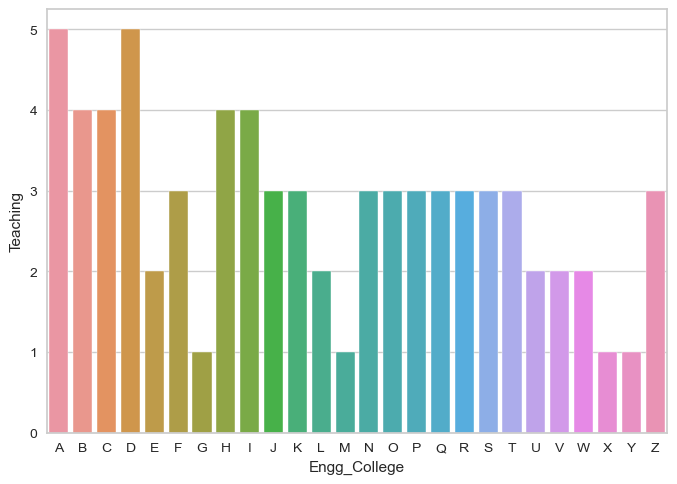

<IPython.core.display.Javascript object>

In [26]:
# Some barplots showing each variable for each of the colleges,
# same results as above however this gives us a nice visualization
sns.barplot(x="Engg_College", y="Teaching", data=df)
plt.show()

Observation: We see that schools A and D have the highest Teaching ratings.

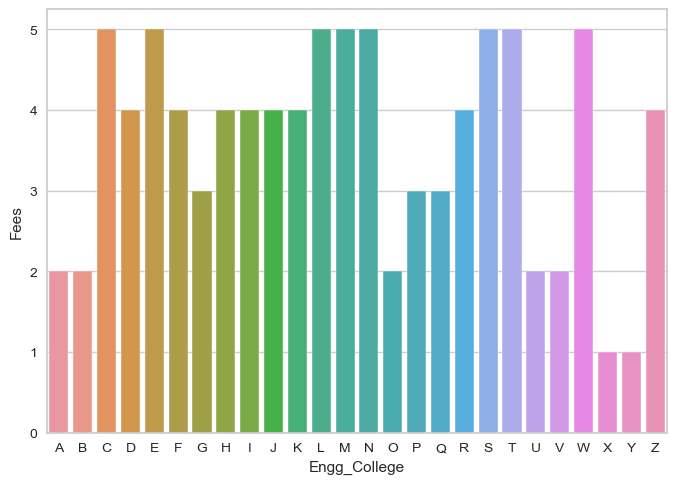

<IPython.core.display.Javascript object>

In [27]:
sns.barplot(x="Engg_College", y="Fees", data=df)
plt.show()

Observation: We see that Schools C,E,L,M,N,S,T and W have the highest fees rating; therefore, we can think higher fees would make students less happy thus, a lower rating and lower fees would make students more happy thus a higher rating. Therefore, these schools have the low or affordable fees. 

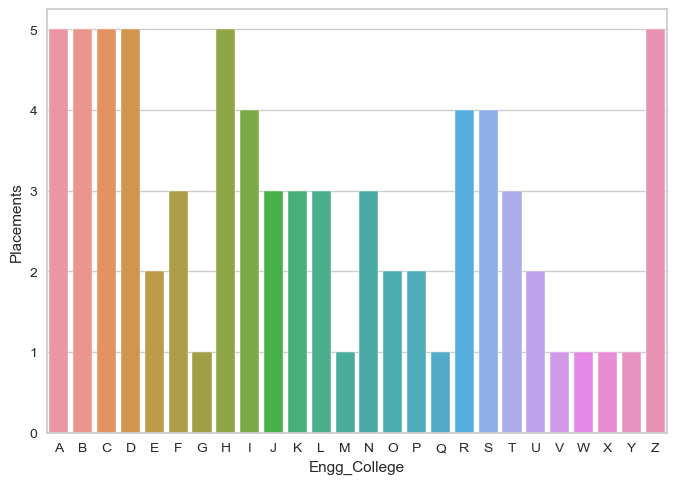

<IPython.core.display.Javascript object>

In [28]:
sns.barplot(x="Engg_College", y="Placements", data=df)
plt.show()

Observation: Schools A,B,C,D,H,and Z have the highest job placement ratings.

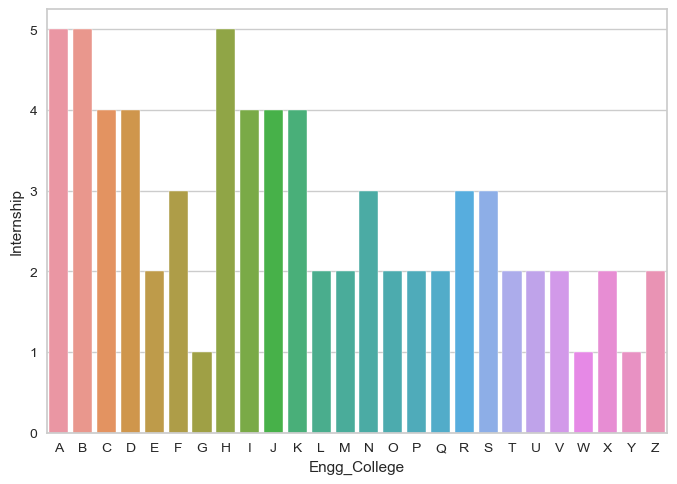

<IPython.core.display.Javascript object>

In [29]:
sns.barplot(x="Engg_College", y="Internship", data=df)
plt.show()

Observation: Schools A,B,and H have the highest internship ratings.

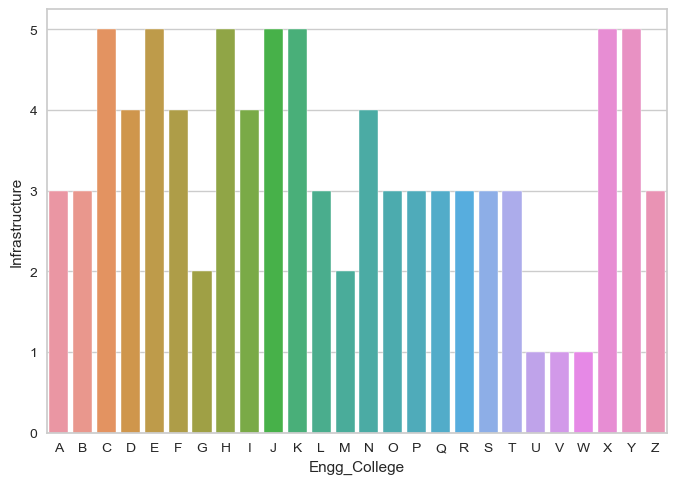

<IPython.core.display.Javascript object>

In [30]:
sns.barplot(x="Engg_College", y="Infrastructure", data=df)
plt.show()

Observation: Schools C,E,H,J,K,X and Y have the highest infrastructure ratings. 

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

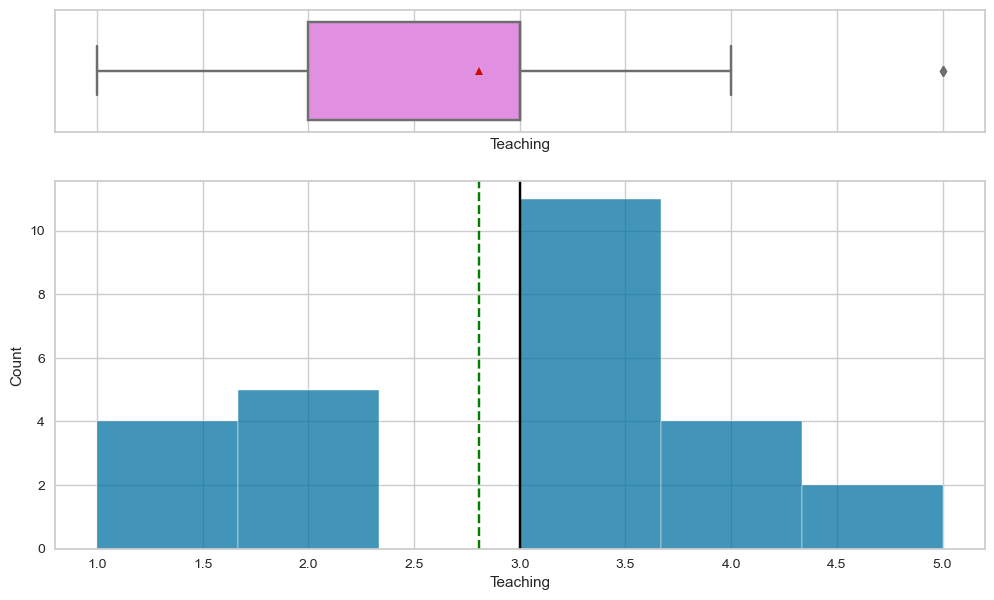

<IPython.core.display.Javascript object>

In [32]:
# selecting numerical variables
histogram_boxplot(data, "Teaching")

Observation: Most schools have a teaching rating between 3-3.7. There appears to be an outlier.

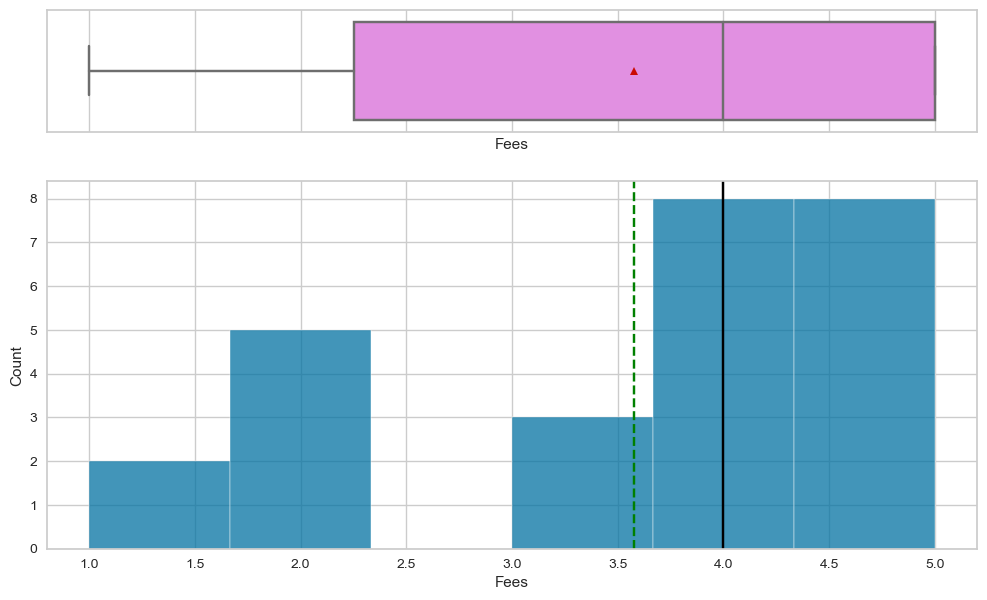

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Fees")

Observation: We see that most schools are rating fees between 3.7-5. There are no outliers.

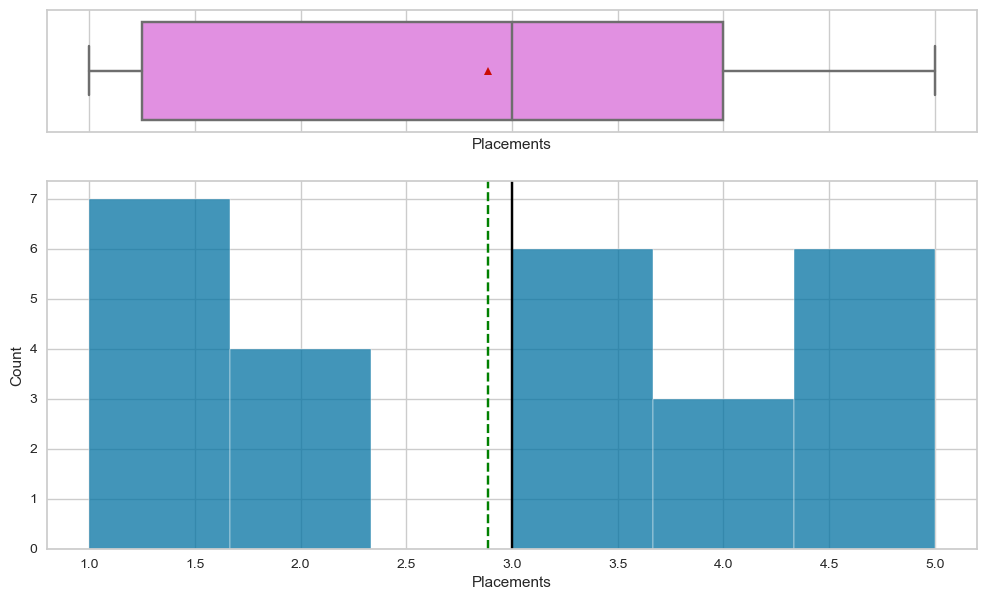

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Placements")

Observation: We see many schools ratings job placements between 1 - 1.7. There are no outliers.

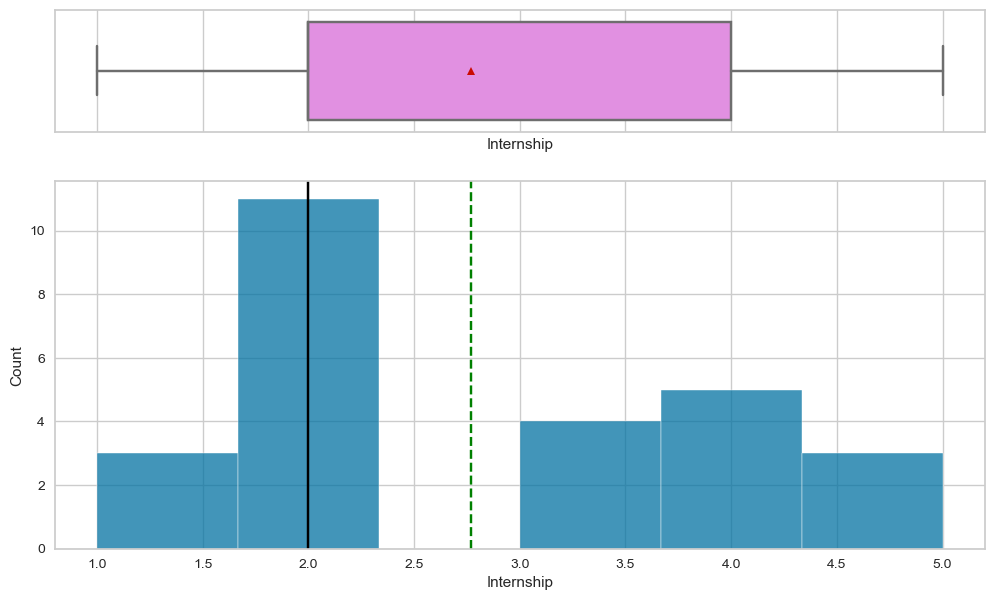

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data, "Internship")

Observation: Most schools rated internship between 1.7-2.3. There are no outliers.

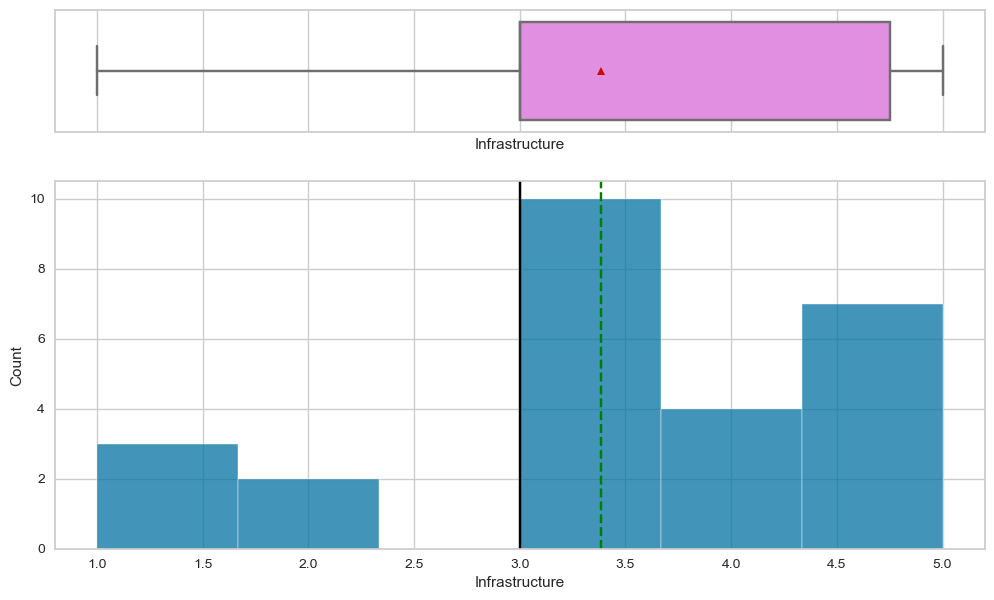

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "Infrastructure")

Observation: We can see that most schools rated infrastructure between 3 to 3.6. There are no outliers.

# Examining CDF (cumulative distribution function) Plots

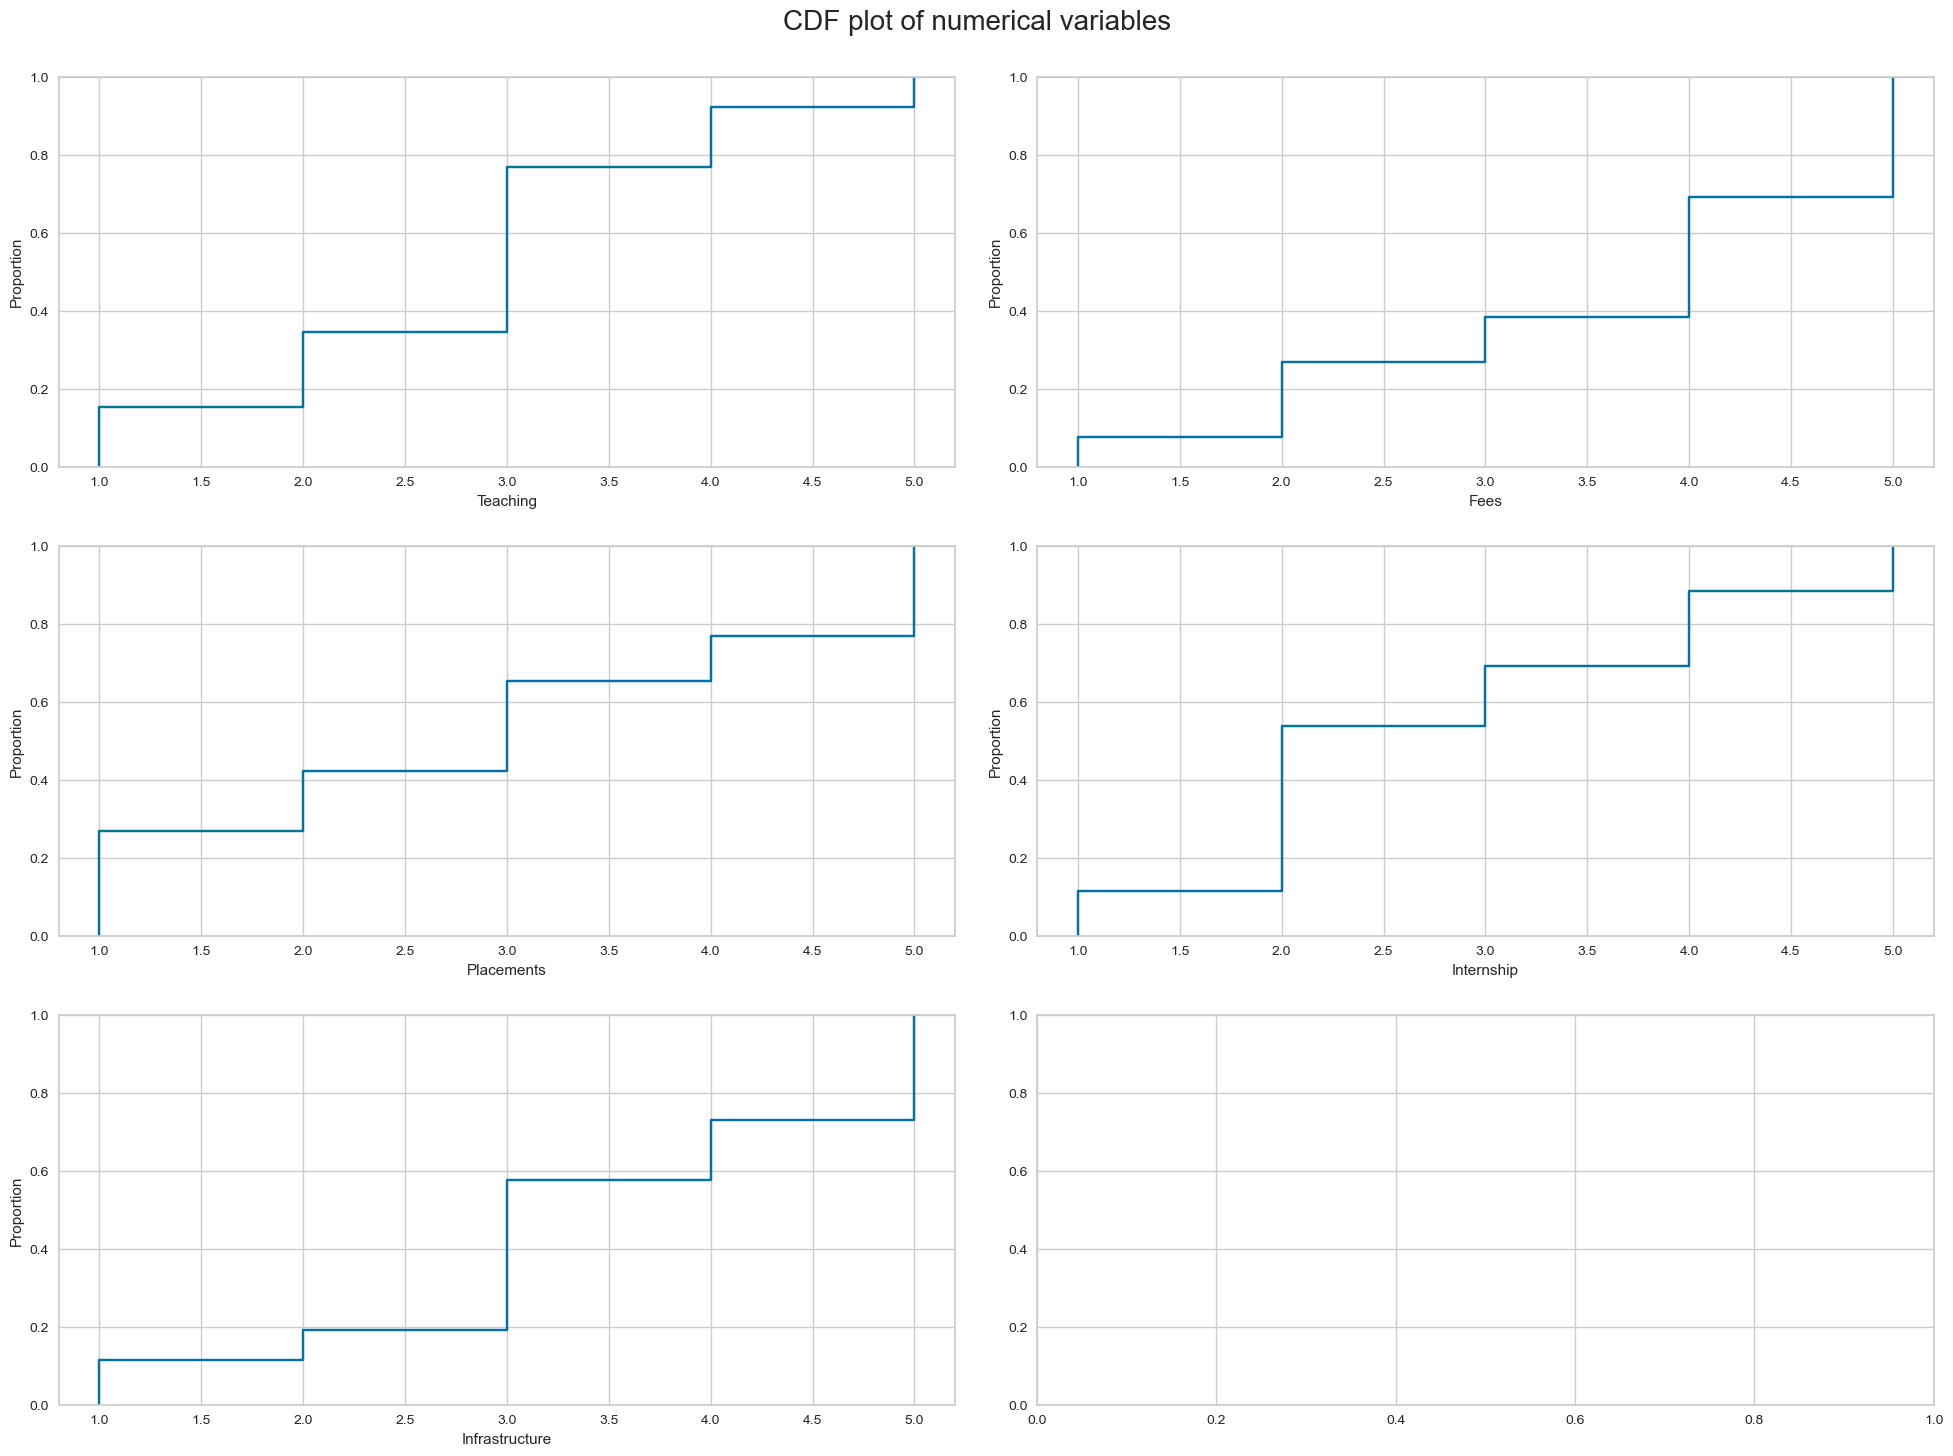

<IPython.core.display.Javascript object>

In [37]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# Proportion is between 0-1 (percentage)
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

Observations:
* 80% of the colleges have a teaching rating of 4 or less than 4. We see a big vertical jump in rating of 3, meaning we have many colleges rating a 3 in teaching.
* Around 68% of colleges rated fees at 4 or less than 4. 
* Around 65% of colleges rated job placement at 3 or less than 3. We see a big vertical jump in rating of 1, meaning we have many colleges rating 1 in job placement.
* Around 88% of colleges rated internship at 4 or less than 4. We see a big vertical jump in rating of 2, meaning we have many colleges rating 2 in internship.
* 59% of colleges rated infrastructure at 3 or less than 3. We also see a big vertical jump at 3, therefore we have many collegest rating 3 in infrastructure.

In [78]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<IPython.core.display.Javascript object>

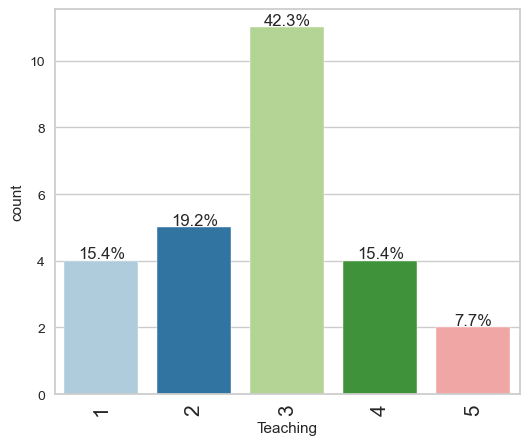

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "Teaching", perc=True)

Observation: 42.3% of colleges rated 3 in teaching.

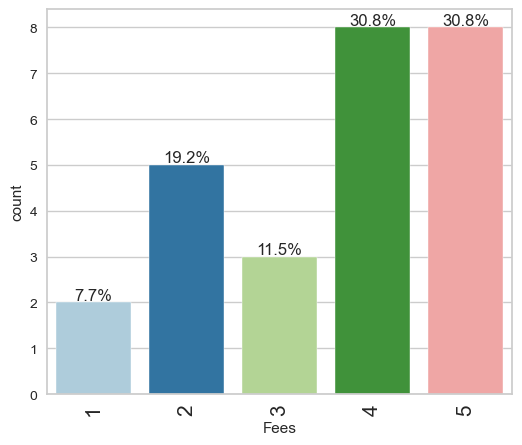

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "Fees", perc=True)

Observation: 61.6% of colleges rated fees at 4 and 5.

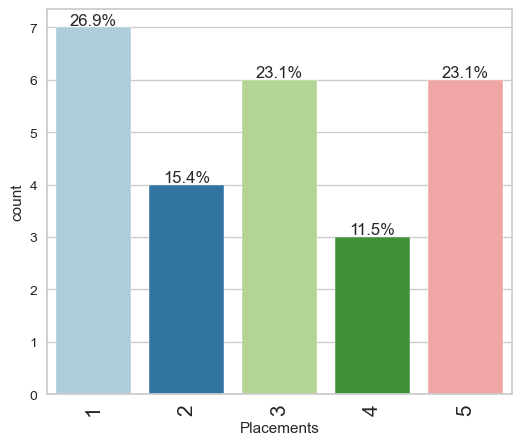

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "Placements", perc=True)

Observation: 26.9% of colleges rated 1 in job placement. 

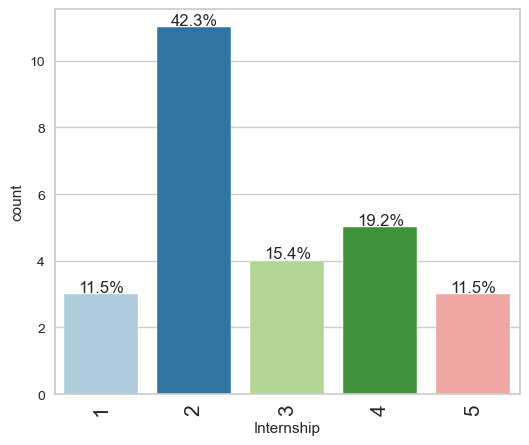

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "Internship", perc=True)

Observation: 42.3% of colleges rated 2 in internship.

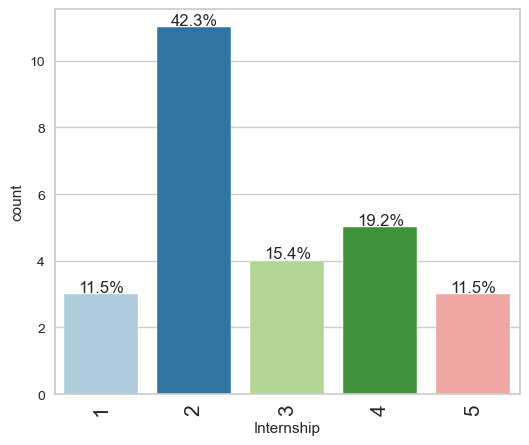

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(data, "Internship", perc=True)

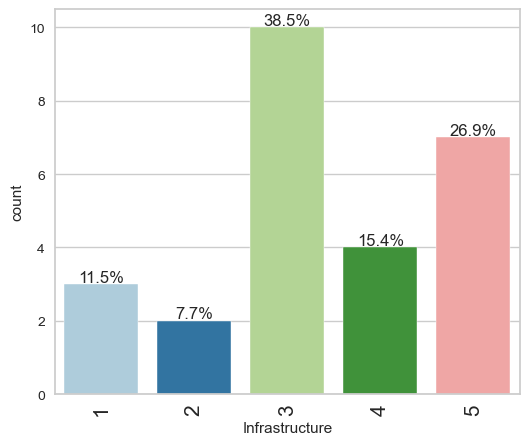

<IPython.core.display.Javascript object>

In [80]:
labeled_barplot(data, "Infrastructure", perc=True)

Observation: 38.5% of colleges rated 3 in infrastructure.

# Bivariate Analysis

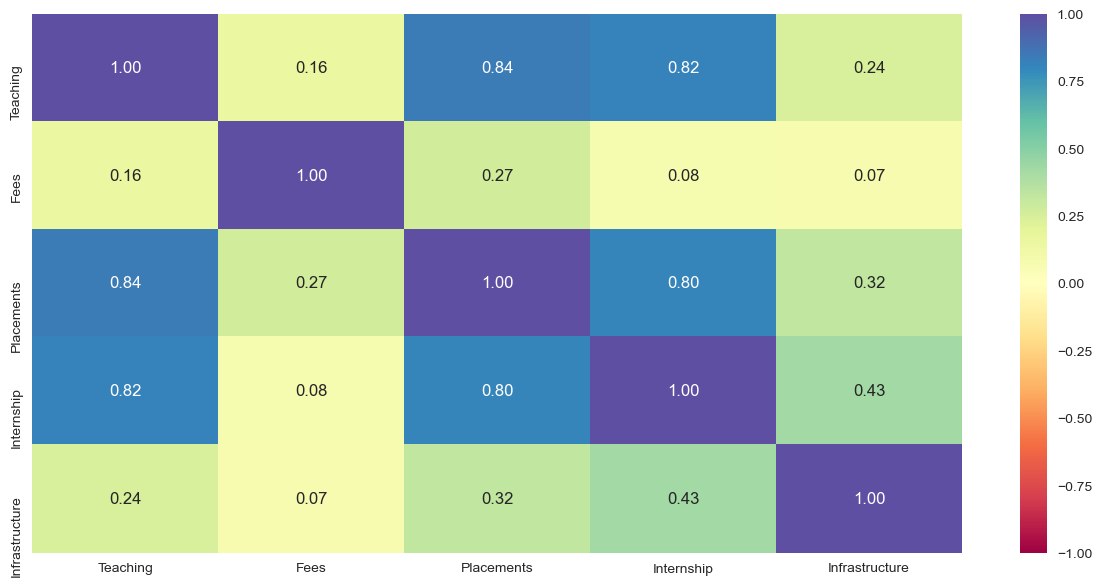

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations: 
* Teaching and fees is correlated with job placements. However, teaching is highly correlated; therefore, teachers might be assisting students in helping find and land jobs. 
* Internships is also highly correlated to teaching. 
* Infrastructure is highly correlated with internship.

# Data Preprocessing

In [45]:
# 1st, we need to choose variables that will be used in clustering
# num_col stores numerical columns
num_col

['Teaching', 'Fees', 'Placements', 'Internship', 'Infrastructure']

<IPython.core.display.Javascript object>

In [52]:
# 2nd, scaling is almost needed in any clustering project before performing clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [53]:
# 3rd, creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [54]:
subset_scaled_df

,Teaching,Fees,Placements,Internship,Infrastructure
0,1.974933,-1.20745,1.408406,1.830464,-0.302061
1,1.074086,-1.20745,1.408406,1.830464,-0.302061
2,1.074086,1.08965,1.408406,1.009911,1.268656
3,1.974933,0.32395,1.408406,1.009911,0.483298
4,-0.727607,1.08965,-0.588970,-0.631194,1.268656
5,0.173240,0.32395,0.076822,0.189358,0.483298
6,-1.628453,-0.44175,-1.254761,-1.451747,-1.087420
7,1.074086,0.32395,1.408406,1.830464,1.268656
8,1.074086,0.32395,0.742614,1.009911,0.483298
9,0.173240,0.32395,0.076822,1.009911,1.268656


<IPython.core.display.Javascript object>

# Model Building

# Elbow Method for finding the best value for K

In [55]:
clusters = range(1, 9)
# creating 8 clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )  # cdist calculate the minimum distance using euclidena measure between data points and centroid in
        # every cluster and with the centroid of the neighboring cluster
        / subset_scaled_df.shape[0]
    )

    # distorion in k-means is defined as the sum of the squared distances between
    # each data point and the centroid within a cluster. The k-means method tries to minimize the distorion.
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.087990295998642
Number of Clusters: 2 	Average Distortion: 1.6030760049686552
Number of Clusters: 3 	Average Distortion: 1.3542868697697457
Number of Clusters: 4 	Average Distortion: 1.1658645562214658
Number of Clusters: 5 	Average Distortion: 1.050851551700608
Number of Clusters: 6 	Average Distortion: 0.9313789989995135
Number of Clusters: 7 	Average Distortion: 0.8210830918162462
Number of Clusters: 8 	Average Distortion: 0.7161563518185236


<IPython.core.display.Javascript object>

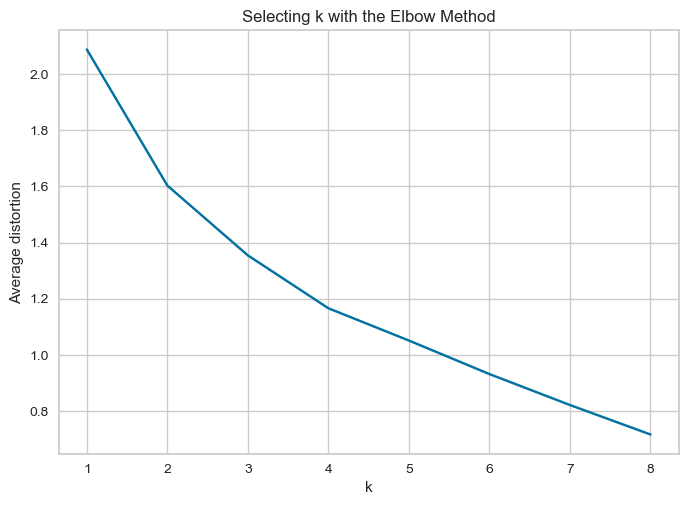

<IPython.core.display.Javascript object>

In [56]:
# plotting the elbow method: a way of choosing a value for k = number of clusters
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

Observation: 
* Appropriate value for k seems to be 4.

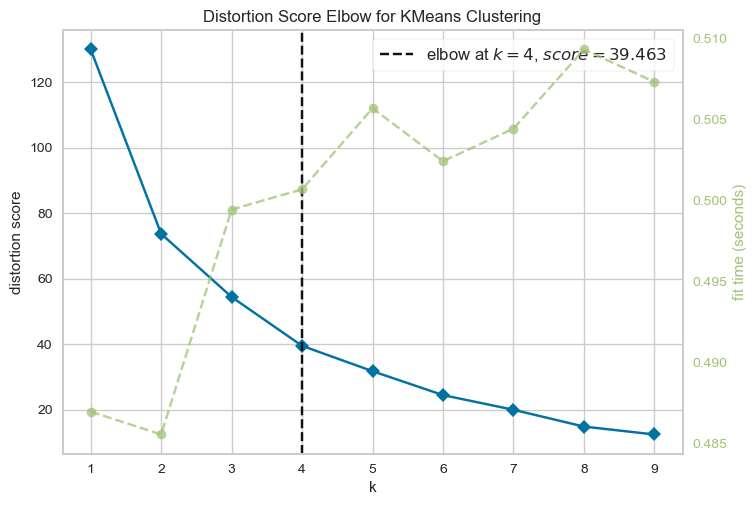

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [57]:
# let's check out the KElbow Visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

Observations:
* K value of 4 has a low distortion score, however it takes some fitting time. 
* K value of 6 is great because it has a lower distortion score than 4 but it does take a bit more fitting time than 4.

# Checking the silhouette scores to find the best value for K

For n_clusters = 2, the silhouette score is 0.3347415593639785)
For n_clusters = 3, the silhouette score is 0.2896589939792401)
For n_clusters = 4, the silhouette score is 0.3490226771698325)
For n_clusters = 5, the silhouette score is 0.3578484211066675)
For n_clusters = 6, the silhouette score is 0.3751606440274479)
For n_clusters = 7, the silhouette score is 0.3661442615367182)
For n_clusters = 8, the silhouette score is 0.3975512934421172)
For n_clusters = 9, the silhouette score is 0.39102713851068926)


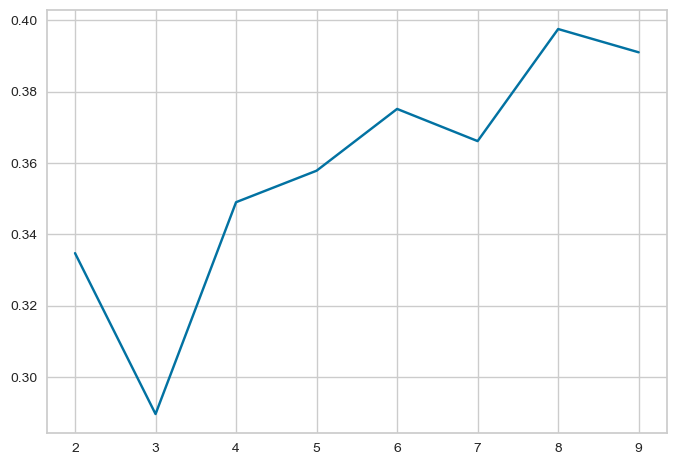

<IPython.core.display.Javascript object>

In [58]:
# let's check the silhouette visualizer out
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Observation: We have a higher silhouette score for 6 than for 4; therefore, we will choose 6 as a value of K.

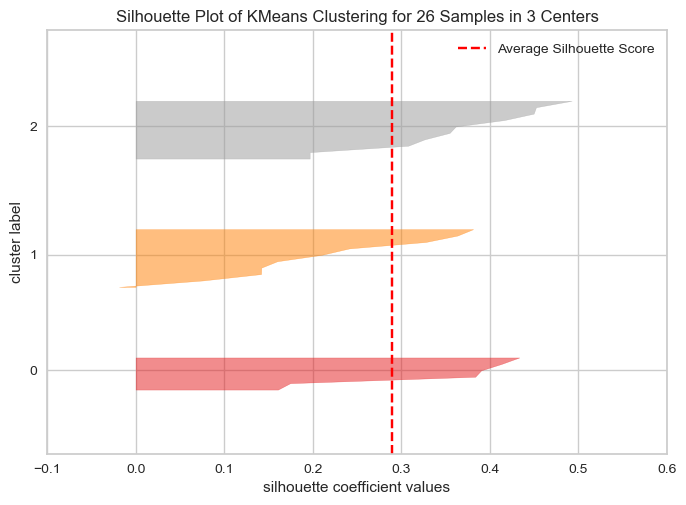

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [59]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

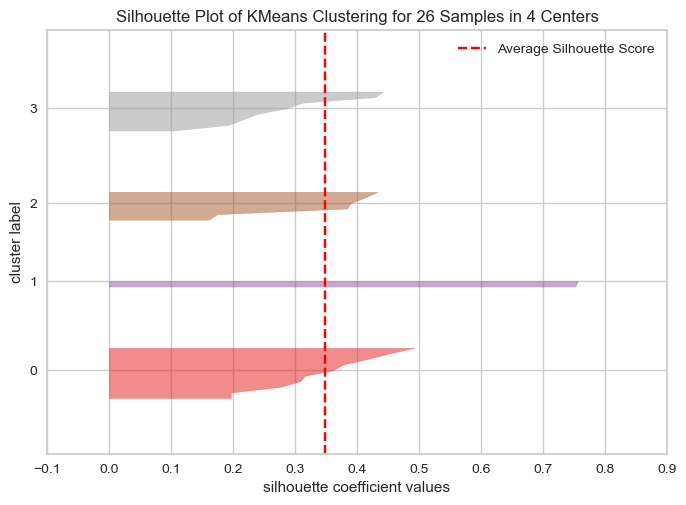

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [60]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

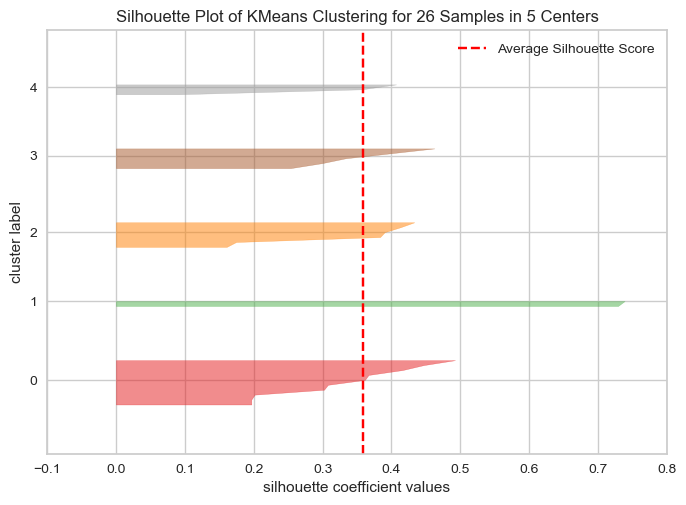

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [61]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

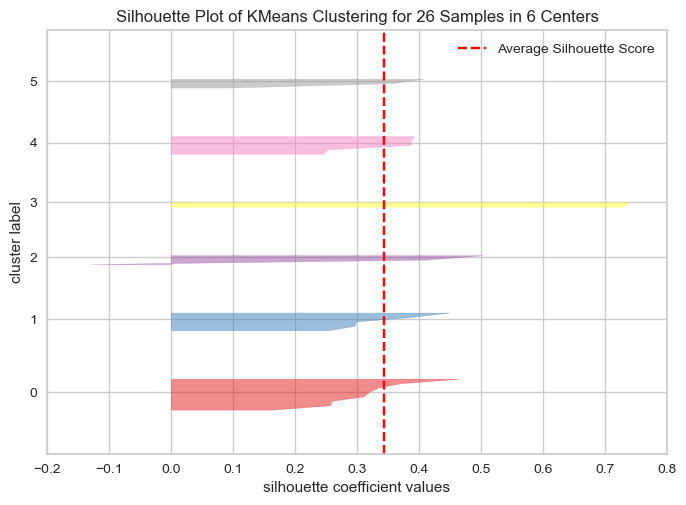

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [62]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

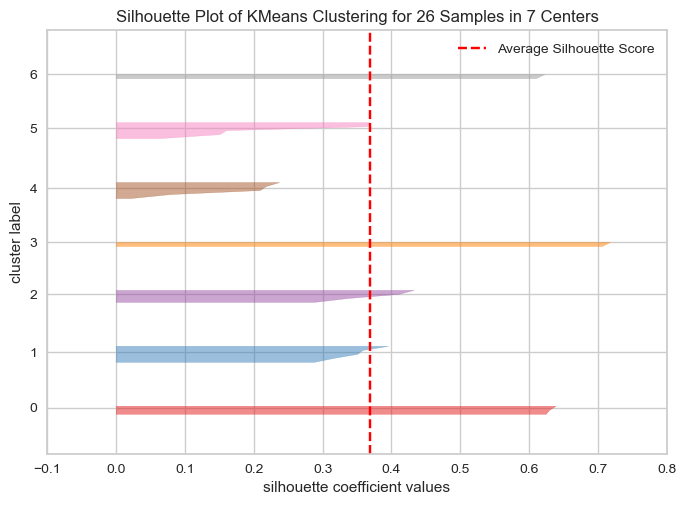

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

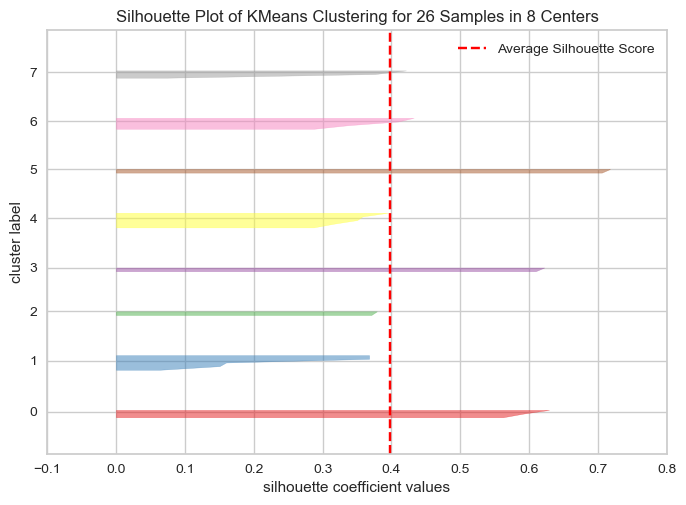

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [64]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Background:
* When most of the instances in a cluster have a lower coefficient than the silhouette score, then the cluster is rather bad since this means its instances are much too close to other clusters. 

Observations: 
* K = 3,4,5, and 6 look pretty good as all instances extend beyond the dashed line. 
* K = 7 and 8 are bad as some instances have lower coefficient values than the silhouette score. 
* If we compare K=4 and K=6, K=4 has some clusters bigger than other and K=6, all clusters seem to have similar sizes.

# Running the model using the best value of K

In [65]:
# let's take 6 as number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=0)

<IPython.core.display.Javascript object>

In [66]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [73]:
df.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,K_means_segments
SR_NO,,,,,,,
1,A,5,2,5,5,3,3
2,B,4,2,5,5,3,3
3,C,4,5,5,4,5,1
4,D,5,4,5,4,4,3
5,E,2,5,2,2,5,4


<IPython.core.display.Javascript object>

# Cluster Profiling

In [67]:
# adding kmeans cluster labels to the original dataframe
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [71]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Fees"].count().values
)

<IPython.core.display.Javascript object>

In [72]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Teaching,Fees,Placements,Internship,Infrastructure,count_in_each_segments
K_means_segments,,,,,,
0,1.333333,4.333333,1.000000,1.333333,1.666667,3
1,3.600000,4.200000,4.000000,4.200000,4.800000,5
2,2.600000,2.400000,1.600000,2.000000,2.200000,5
3,4.666667,2.666667,5.000000,4.666667,3.333333,3
4,2.750000,4.625000,3.375000,2.500000,3.500000,8
5,1.000000,1.000000,1.000000,1.500000,5.000000,2


<IPython.core.display.Javascript object>

Observations: 
* K means 3 has the highest teaching, placements, and internship ratings. However, it has a quite low rating in fees, therefore, these schools will have high fees. We can also see that infrastructure is rated at 3.33. Eventhough infrastrucutre is not the highest, most students are concerned on job placements, teaching quality and internships as well. 
* K means 1 has pretty good scores in fees, placements, internship and infrastructure. The teaching rating is a bit lower but its not the worse score. Therefore, all students who dont want to pay high fees but still want a good internship and job placement rating might consider these schools.

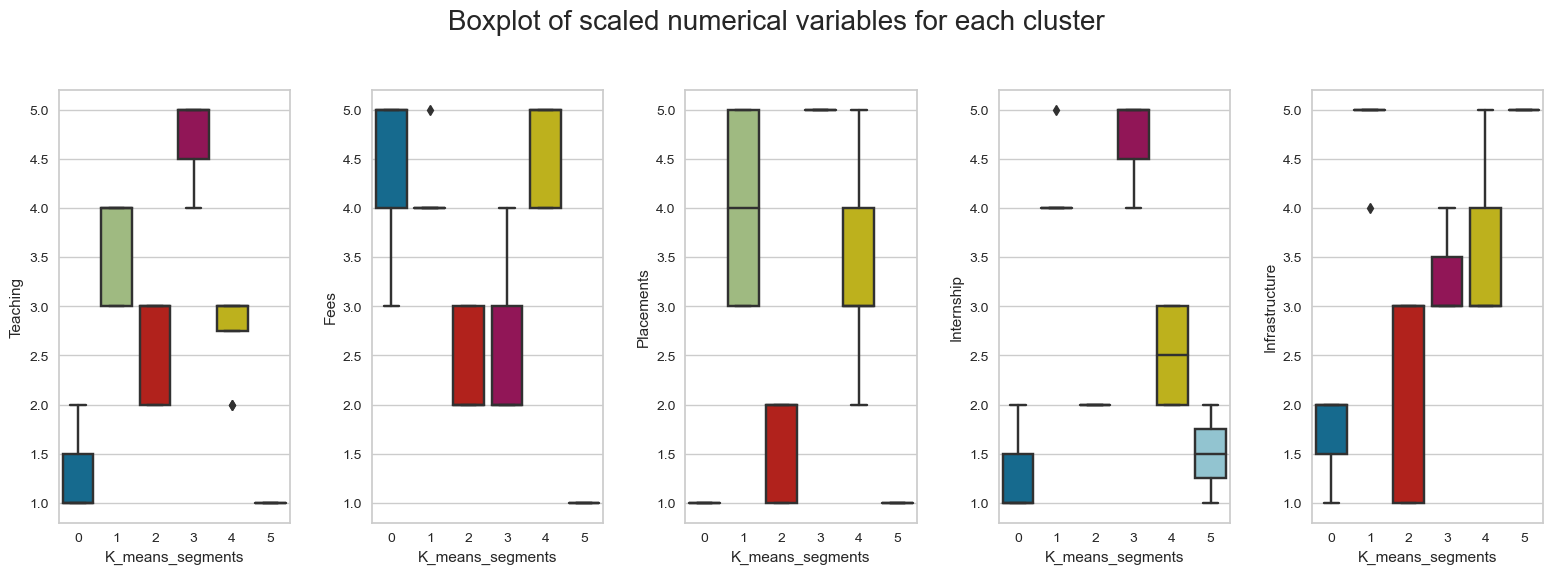

<IPython.core.display.Javascript object>

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Insights for each cluster

Cluster 0: 
* Teaching ratings on this cluster are lower than any other cluster.
* Fee ratings on this cluster are high, therefore this might indicate these schools are more affordable.
* Job placement ratings are 1 in this cluster, therefore these students graduating these schools have a higher chance of graduating without a job in place.
* Infrastructure rating is low for this cluster as well. 

Cluster 1: 
* This cluster has a teaching rating between 3-4.
* Fees are rated is 4 or around 4.
* Job placements are between 3-5 with a median rating of 4. 
* Internship rating is 4 or around 4.
* Infrastructure rating is closer to 5 or 5.

Cluster 2:
* Teaching rating is between 2-3.
* Fees rating is also between 2-3.
* Job placement rating is low, between 1-2.
* Internship rating is also low at 2.
* Infrastructure rating is also low between 1-3. 
* The schools in this cluster have high fees and really low ratings in all other variables.

Cluster 3: 
* This cluster has the highest teaching rating than any other clusters.
* Fee rating in this cluster is between 2-3.
* Job placement rating in this cluster is high at 5 or close to 5. 
* Internship rating is also the highest than any other cluster, between 4.5-5.
* Infrastructure rating is medium, between 3-3.5. 
* The schools in this cluster have high fees but you have high teaching, job placement and internship ratings.

Cluster 4: 
* This cluster has a low teaching rating between 2.7-3.
* Fees have high ratings between 4-5.
* Job placement ratings are between 3-4.
* Internship ratings are low, between 2-3 with a median of 2.5
* Infrastructure rating is between 3-4. 
* Collegest in this cluster are affordable but their ratings in teaching, job placements and internships are low.

Cluster 5: 
* Teaching, fees and placement ratings are 1 or near 1, which are all bad ratings. 
* Internship ratings is between 1.3-2.3 with a median of 1.5 which is also bad. 
* Infrastructure has a high rating 5 or near 5. 
* Colleges in this cluster are expensive; they have bad teaching, job placement and internship ratings but have really good infrastructures. 



# Let's compare Cluster vs Engg College

In [75]:
pd.crosstab(df.K_means_segments, df.Engg_College).style.highlight_max(
    color="lightgreen", axis=0
)

Engg_College,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

Observation: In my opinion, clusters 1 and 3 are the best. From this crosstable we can see that Cluster 1 colleges is comprised of: C,H,I,J,K and cluster 3: A,B, and D.

# Conclusion:

* Cluster 0 has pretty low ratings except in fees; therefore, colleges in this cluster are affordable but certainly not a good choice for students.
* Cluster 1 has good ratings in job placements, internships and infrastructure; these schools are affordable. Their teaching rate is ok but this option is a really great option for students. Great chance of getting internships and jobs and also good teachers at an affordable fee.
* Cluster 2 have pretty low ratings across all variables, these schools are affordable but also not a good choice for students. 
* Cluster 3 have the highets teaching, job placement and internship ratings, however their fee ratings are low and the infrastructure is ok. This is a grea option for students who don't mind paying higher fees to get great teachers, job placement and internship opportunities. Their infrastructure is not the best but its not the worse.
* Cluster 4 have low internship and teaching ratings; it has the highest rating in fees and placement and infrastucture are good. These schools are good for students who want affordable fees and ok job placement opportunities and infrastructure. 
* Cluster 5 have low ratings in all variables except in infrastructure. It has the best infrastructure rating. These are expensive schools that have the best infrastructure but that would be it. 

* I believe the best options are cluster 1 and 3 schools.